In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):
    with open(filename) as training_file:
        reader = csv.reader(training_file,delimiter=',')
        imgs = []
        labels = []
        next(reader, None)
        
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))
            imgs.append(img)
            labels.append(label)
        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)
    
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(26,activation='softmax')                       
])

# Compile Model. 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

# Configure generators
train_gen = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=64
)
val_gen = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=64
)

# Train the Model
history = model.fit_generator(
    train_gen,
    epochs=20,
    validation_data = val_gen,
)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/20
429/429 [==============================] - 42s 99ms/step - loss: 2.8086 - acc: 0.1515 - val_loss: 2.0806 - val_acc: 0.2740
Epoch 2/20
429/429 [==============================] - 43s 99ms/step - loss: 2.1228 - acc: 0.3315 - val_loss: 1.4719 - val_acc: 0.5264
Epoch 3/20
429/429 [==============================] - 42s 98ms/step - loss: 1.7542 - acc: 0.4361 - val_loss: 1.3652 - val_acc: 0.5498
Epoch 4/20
429/429 [==============================] - 43s 100ms/step - loss: 1.4900 - acc: 0.5146 - val_loss: 1.1445 - val_acc: 0.5936
Epoch 5/20
429/429 [==============================] - 40s 94ms/step - loss: 1.3097 - acc: 0.5723 - val_loss: 0.9232 - val_acc: 0.6895
Epoch 6/20
429/429 [==============================] - 43s 100ms/step - loss: 1.1594 - acc: 0.6204 - val_loss: 0.6488 - val_acc: 0.7752
Epoch 7/20
429/429 [==============================] - 43s 100ms/step - loss: 1.0515 - acc: 0.6549 - val_loss: 0.6566 - val_acc: 0.7662
Epoch 8/20
429/429 [==============================] - 44s 1

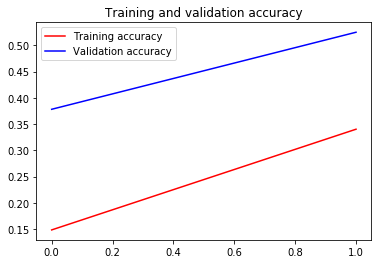

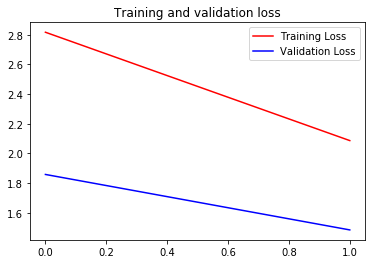

In [6]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()